## Satwik Dudeja - DSBA Intern @ The Sparks Foundation

# Task 5 - Exploring Business Analytics

## EDA of Business Data for a Sample Superstore

    This task revolves around Exploratory Data Analysis on a provided SuperStore dataset, to identify business problems, weak areas, and areas of potential improvement.

### 1. Importing libraries

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Importing and Preprocessing the Data

    Source - https://drive.google.com/file/d/1lV7is1B566UQPYzzY8R2ZmOritTW299S/view
    The data was downloaded and stored in the directory.

In [135]:
data = pd.read_csv('SampleSuperstore.csv')

In [136]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [137]:
data = data.drop(['Postal Code'],axis=1)

In [138]:
data.isna().any()

Ship Mode       False
Segment         False
Country         False
City            False
State           False
Region          False
Category        False
Sub-Category    False
Sales           False
Quantity        False
Discount        False
Profit          False
dtype: bool

In [139]:
data.duplicated().sum()

50

In [140]:
data.drop_duplicates(subset = None, keep = 'first', inplace = True)

In [141]:
data.duplicated().sum()

0

#### Thus, there are no null values in the dataset and the duplicates were removed. The dataset is clean and ready for use.

### 3. Exploring the Dataset

    Exploring the dataframe includes getting to know about what all attributes of the data are given, their datatypes, number of entries, and standard statistical values.

In [142]:
data.describe()

,Sales,Quantity,Discount,Profit
count,9944.000000,9944.000000,9944.000000,9944.000000
mean,230.752150,3.794047,0.156440,28.770873
std,624.644765,2.228752,0.206584,234.841370
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.340000,2.000000,0.000000,1.724800
50%,55.000000,3.000000,0.200000,8.679950
75%,210.104000,5.000000,0.200000,29.534700
max,22638.480000,14.000000,0.800000,8399.976000


In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9944 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9944 non-null   object 
 1   Segment       9944 non-null   object 
 2   Country       9944 non-null   object 
 3   City          9944 non-null   object 
 4   State         9944 non-null   object 
 5   Region        9944 non-null   object 
 6   Category      9944 non-null   object 
 7   Sub-Category  9944 non-null   object 
 8   Sales         9944 non-null   float64
 9   Quantity      9944 non-null   int64  
 10  Discount      9944 non-null   float64
 11  Profit        9944 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 1009.9+ KB


In [144]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

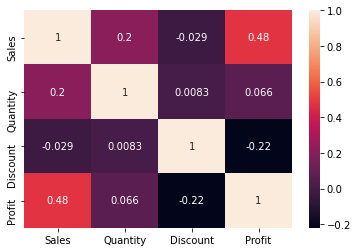

In [145]:
correlation = data.corr()
_ = sns.heatmap(correlation, annot = True)

### 4. Exploratory Data Analysis

    Visualizing the data helps in drawing several inferences from the data. Various plots are simulated to explore the data and draw conclusions.

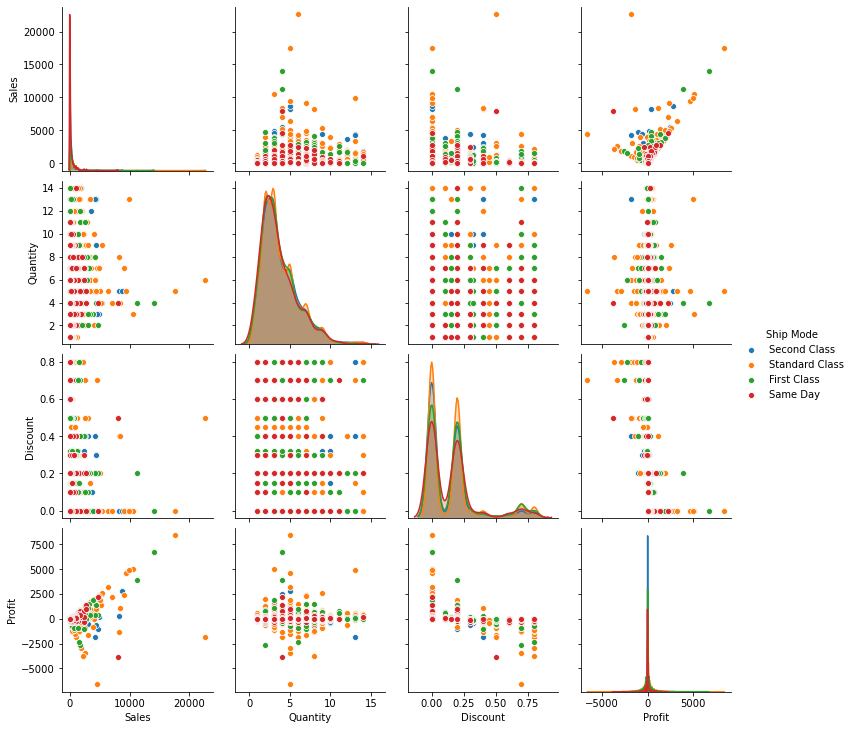

In [146]:
_ = sns.pairplot(data, hue="Ship Mode")

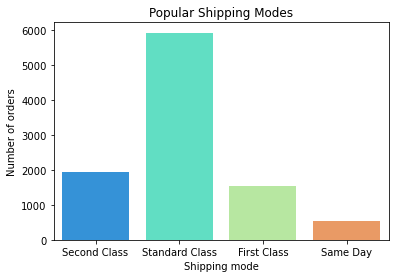

In [147]:
_ = sns.countplot('Ship Mode',data=data, palette='rainbow')
_ = plt.title('Popular Shipping Modes')
_ = plt.xlabel('Shipping mode')
_ = plt.ylabel('Number of orders')
plt.show()

#### The Standard Class is the most popular Shipping mode, since it sees the most number of orders.

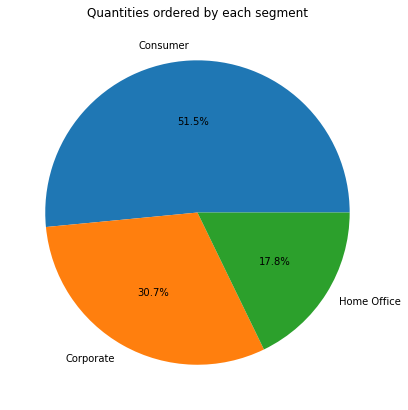

In [148]:
df = data.groupby('Segment')['Quantity'].sum().reset_index()

labels = data['Segment'].unique()

_ = plt.figure(figsize=(7, 7))
_ = plt.pie(df['Quantity'], labels=labels, autopct='%1.1f%%')
_ = plt.title('Quantities ordered by each segment')
plt.show()

#### The most number of orders are from the Consumer Segment.

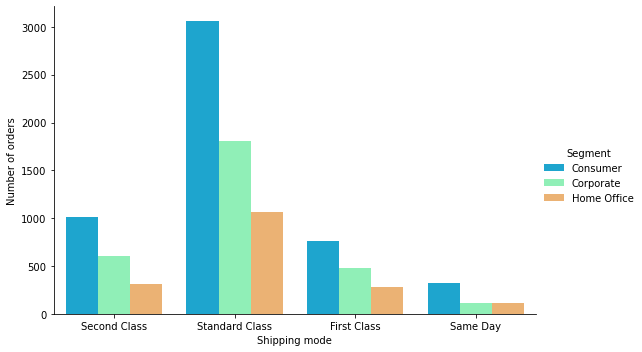

In [149]:
_ = sns.catplot('Ship Mode', data=data, hue='Segment', kind='count', palette='rainbow', aspect=1.5)
_ = plt.xlabel('Shipping mode')
_ = plt.ylabel('Number of orders')
plt.show()

In [150]:
data["State"].value_counts()

California              1980
New York                1119
Texas                    980
Pennsylvania             581
Washington               502
Illinois                 490
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

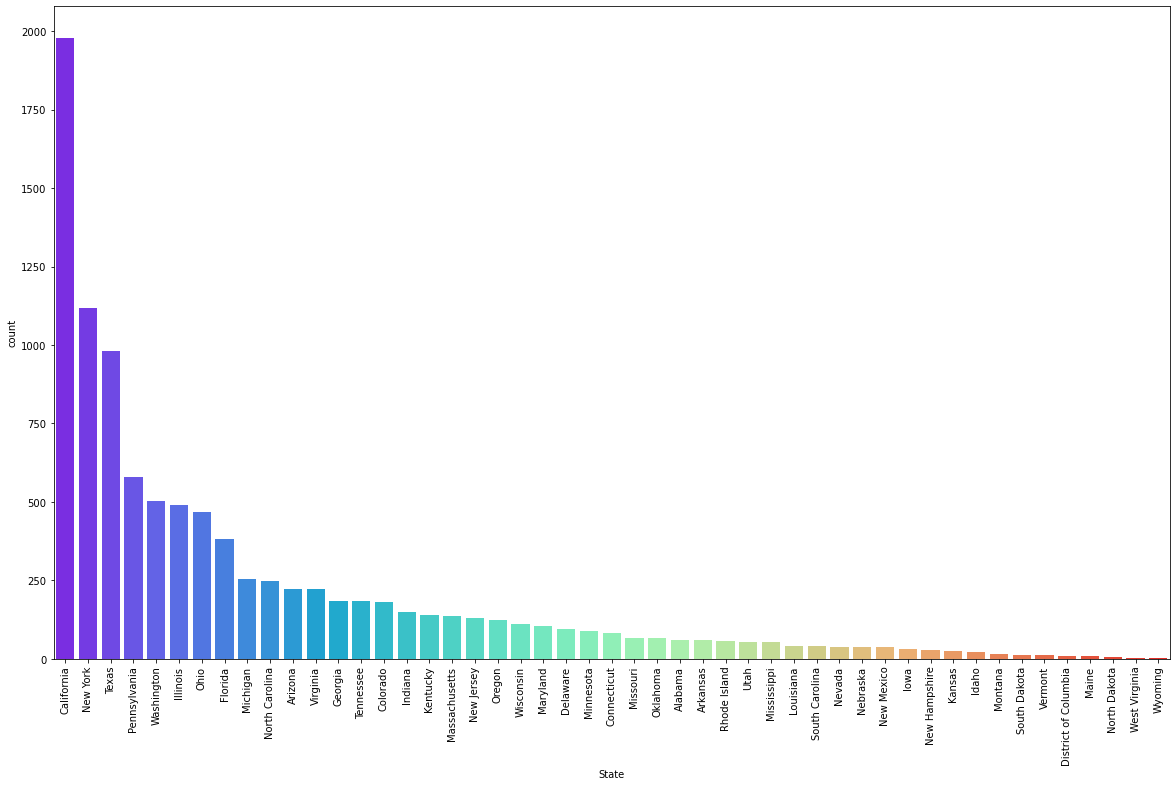

In [151]:
plt.figure(figsize=(20,12))
sns.countplot(x='State',data=data, palette='rainbow', order=data['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

#### California and New York are the states generating the highest number of sales.

In [152]:
cities = data.groupby('City')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)
top_cities = cities.head(20)
bottom_cities = cities.tail(20)

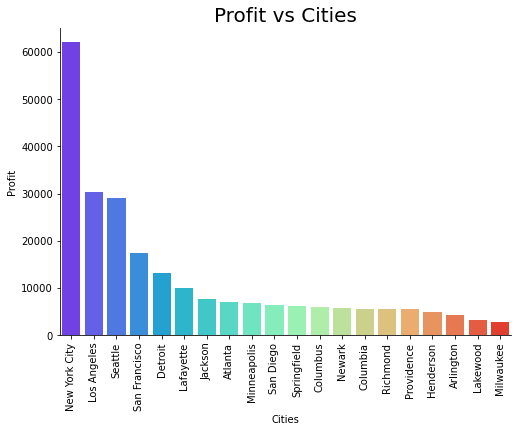

In [153]:
_ = sns.catplot('City','Profit', data=top_cities, kind='bar', aspect=1.5, palette='rainbow')
_ = plt.title('Profit vs Cities',size=20)
_ = plt.xticks(rotation=90)
_ = plt.ylabel('Profit')
_ = plt.xlabel('Cities')
plt.show()

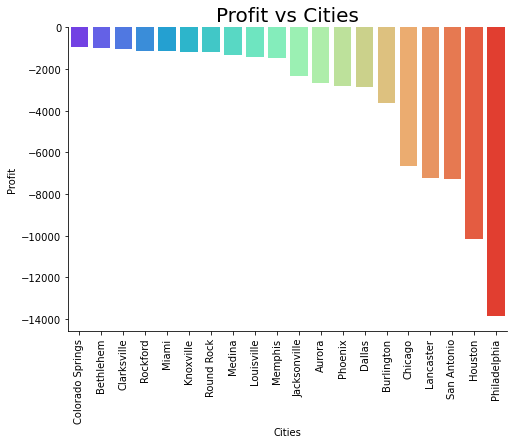

In [154]:
_ = sns.catplot('City','Profit', data=bottom_cities, kind='bar', aspect=1.5, palette='rainbow')
_ = plt.title('Profit vs Cities',size=20)
_ = plt.xticks(rotation=90)
_ = plt.ylabel('Profit')
_ = plt.xlabel('Cities')
plt.show()

#### New York is the leading city in terms of profit statistics. Philadelphia and Houston incur the maximum losses.

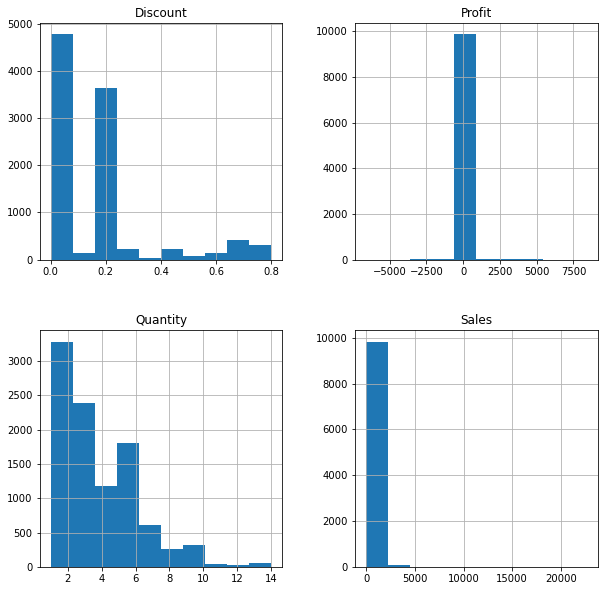

In [155]:
_ = data.hist(figsize=(10,10),bins=10)
plt.show()

#### Discounts on items are generally 0% or 20%.

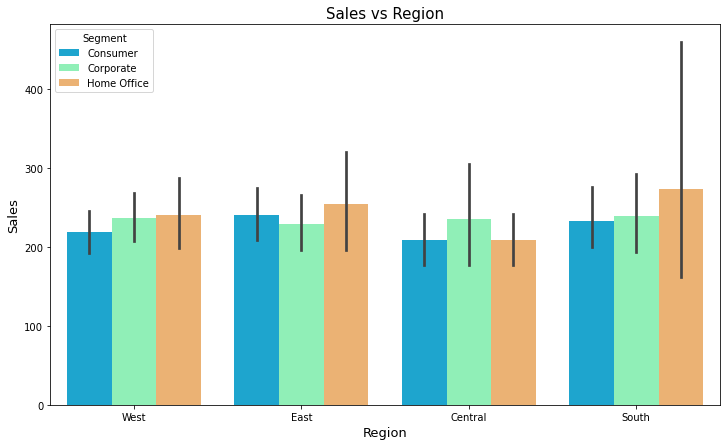

In [156]:
_ = plt.figure(figsize=(12, 7))
_ = sns.barplot(data['Region'], data['Sales'], data=data, hue='Segment', order=data['Region'].value_counts().index, palette='rainbow')
_ = plt.title('Sales vs Region',size= 15)
_ = plt.xlabel('Region',size= 13)
_ = plt.ylabel('Sales',size= 13)
plt.show()

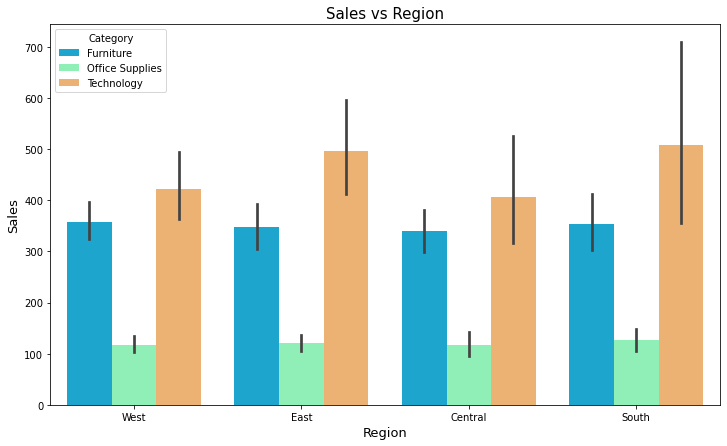

In [157]:
_ = plt.figure(figsize=(12, 7))
_ = sns.barplot(data['Region'], data['Sales'], data=data, hue='Category', order=data['Region'].value_counts().index, palette='rainbow')
_ = plt.title('Sales vs Region',size= 15)
_ = plt.xlabel('Region',size= 13)
_ = plt.ylabel('Sales',size= 13)
plt.show()

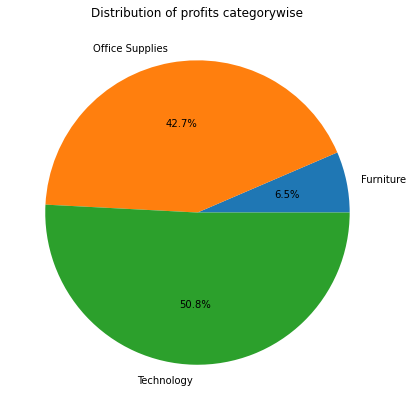

In [158]:
dfprofit = data.groupby('Category')['Profit'].sum().reset_index()

labels = dfprofit['Category'].unique()

_ = plt.figure(figsize=(7, 7))
_ = plt.pie(dfprofit['Profit'], autopct='%1.1f%%', labels=labels)
_ = plt.title('Distribution of profits categorywise')
plt.show()

#### Technology is the category with the most no. of sales across all regions, followed closely by Furniture. But in terms of profit, Furniture lags behind drastically.

In [159]:
products = data.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)

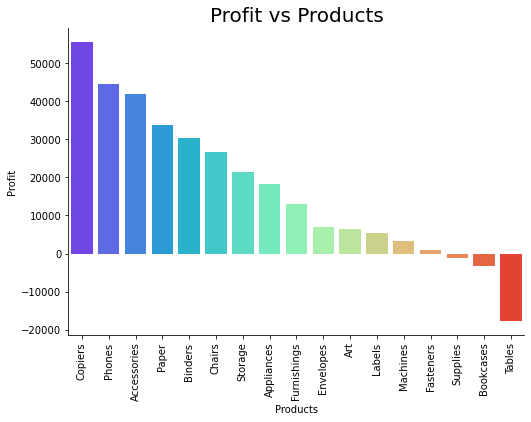

In [160]:
_ = sns.catplot('Sub-Category','Profit', data=products, kind='bar', aspect=1.5, palette='rainbow')
_ = plt.title('Profit vs Products',size=20)
_ = plt.xticks(rotation=90)
_ = plt.ylabel('Profit')
_ = plt.xlabel('Products')
plt.show()

#### Copies and other technology products are the top profit making sub-categories, with bookcases and tables incurring loss for the superstore.

### 5. Summary

1. The Standard Class is the most popular Shipping mode, since it sees the most number of orders.
2. The most number of orders are from the Consumer Segment, and Technology Category, the least being in Home Supplies. However, Furniture generates most loss.
3. California and New York are the states generating the highest number of sales.
4. Discounts on items are generally 0% or 20%.
5. New York is the leading city in terms of profit statistics. Philadelphia and Houston incur the maximum losses.
6. Copies and other technology products are the top profit making sub-categories, with bookcases and tables incurring loss for the superstore.

Efforts like surveys to know customer opinions, partnerships with Home Supplies companies, etc. should be made to increase sales/profits in these areas.